## This notebook will discuss the K Means algorithm in Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Dataset

import kagglehub

# Download latest version
path = kagglehub.dataset_download("abineshkumark/carsdata")

print("Path to dataset files:", path)

/home/blackcat/BlackCat/Project_Personal/Generative AI/Car Classification with KMeans/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/blackcat/.cache/kagglehub/datasets/abineshkumark/carsdata/versions/1


In [3]:
dataset = pd.read_csv(path + '/cars.csv')
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [4]:
x = dataset[dataset.columns[:-1]]
#x['cylinders'] = x['cylinders'].apply(pd.to_numeric, axis=0)
x.dtypes


mpg             float64
 cylinders        int64
 cubicinches     object
 hp               int64
 weightlbs       object
 time-to-60       int64
 year             int64
dtype: object

In [5]:
# eliminate null value

x = x.apply(lambda col: col.fillna(col.mean()) if col.dtype.kind in 'iufc' else col)
x.dtypes
#x.head()

mpg             float64
 cylinders        int64
 cubicinches     object
 hp               int64
 weightlbs       object
 time-to-60       int64
 year             int64
dtype: object

In [6]:
for i in x.columns:
    print(x[i].isnull().sum())

0
0
0
0
0
0
0


In [7]:
#Checking if all the column value is numeric
for col in x.columns:
    # Attempt to convert each column to numeric (coerce errors to NaN)
    try_numeric = pd.to_numeric(x[col], errors='coerce')
    
    # Check how many values became NaN (meaning they were not valid numbers)
    num_na = try_numeric.isna().sum()
    
    if num_na > 0:
        print(f"Column '{col}' has {num_na} invalid numeric values.")
        # Optionally inspect some of these invalid values
        invalid_vals = x.loc[try_numeric.isna(), col].unique()
        print(f"  Invalid entries: {invalid_vals[:10]}")  # Show up to 10 unique invalid entries


Column ' cubicinches' has 2 invalid numeric values.
  Invalid entries: [' ']
Column ' weightlbs' has 3 invalid numeric values.
  Invalid entries: [' ']


In [8]:
#Converting the problemetic columns
for col in x.columns:
    if x[col].dtype == 'object' or x[col].dtype == 'string':
        x[col] = pd.to_numeric(x[col], errors='coerce')

# Now fill new NaN values (from invalid floats) with, for example, the column mean:
x = x.fillna(x.mean())

In [9]:
print(x.dtypes)

mpg             float64
 cylinders        int64
 cubicinches    float64
 hp               int64
 weightlbs      float64
 time-to-60       int64
 year             int64
dtype: object


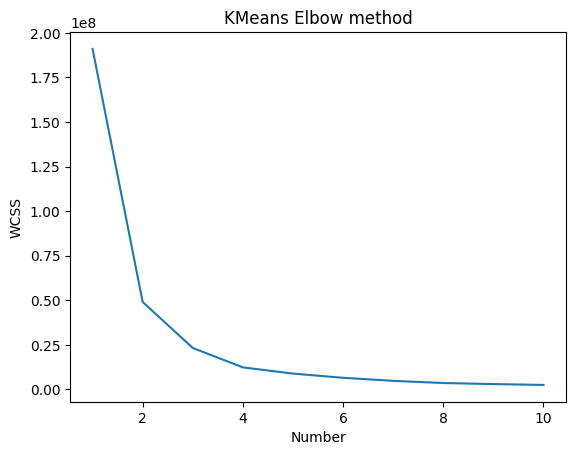

In [10]:
# Elbow method to get the kmeans
from sklearn.cluster import KMeans

wcss = []

for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('KMeans Elbow method')
plt.xlabel('Number')
plt.ylabel('WCSS')
plt.show()


In [11]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

x = x.to_numpy()


we are now going to plot first two value just to see

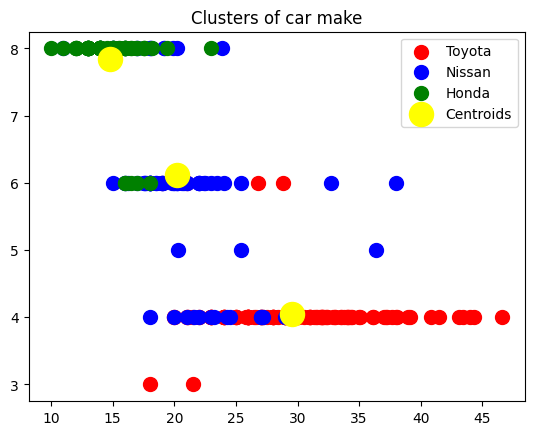

In [12]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans ==0, 1], s=100, c='red', label='Toyota')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans ==1, 1], s=100, c='blue', label='Nissan')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans ==2, 1], s=100, c='green', label='Honda')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of car make')
plt.legend()
plt.show()